In [4]:
import numpy as np
import pandas as pd
import tushare as ts
import matplotlib.pyplot as plt

# 5只银行股：中国银行，工商银行，建设银行，农业银行，交通银行
symbols = ['601988', '601398', '601939', '601288', '601328']

indexes = pd.date_range('2018-11-01', '2019-10-31')
data = pd.DataFrame(index=indexes)
for sym in symbols:
    df = ts.get_hist_data(sym, start='2018-11-01', end='2019-10-31')
    df = df.iloc[::-1]
    df.index = pd.to_datetime(df.index)
    data[sym] = df['close']
data = data.dropna()

data

,601988,601398,601939,601288,601328
2018-11-01,3.67,5.57,7.09,3.82,5.90
2018-11-02,3.71,5.64,7.17,3.87,5.96
2018-11-05,3.68,5.56,7.05,3.82,5.92
2018-11-06,3.66,5.53,7.00,3.79,5.93
2018-11-07,3.66,5.52,6.97,3.78,5.89
...,...,...,...,...,...
2019-10-25,3.73,5.98,7.44,3.66,5.71
2019-10-28,3.71,5.93,7.36,3.65,5.66
2019-10-29,3.69,5.91,7.30,3.61,5.64
2019-10-30,3.69,5.95,7.32,3.62,5.63


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


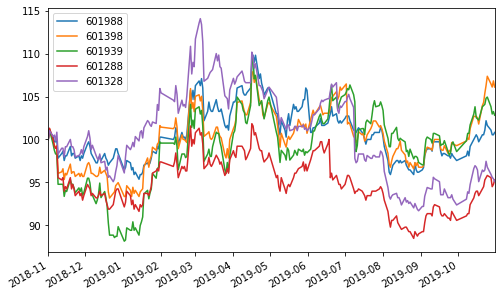

In [5]:
(data / data.ix[0] * 100).plot(figsize=(8, 5))

In [6]:
rets = np.log(data / data.shift(1))


In [7]:
rets.mean() * 252


601988    0.008478
601398    0.061699
601939    0.028968
601288   -0.050261
601328   -0.052484
dtype: float64

In [8]:
rets.cov()*252

,601988,601398,601939,601288,601328
601988,0.021536,0.017676,0.022244,0.016638,0.017843
601398,0.017676,0.026832,0.027459,0.019166,0.020779
601939,0.022244,0.027459,0.040803,0.022863,0.026238
601288,0.016638,0.019166,0.022863,0.022726,0.018519
601328,0.017843,0.020779,0.026238,0.018519,0.029754


In [9]:
noa = 5
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.16945148, 0.33671622, 0.28653469, 0.11426962, 0.09302799])

In [10]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))


0.02431369795807486

In [11]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))


0.1559285027122202

0.13892905177944123 -0.009626936485367842
[0.4723578  0.10770732 0.01269236 0.32807868 0.07916384]
0.1681936990958402 0.045881299897948
[0.01741012 0.59785404 0.35591671 0.02207346 0.00674566]


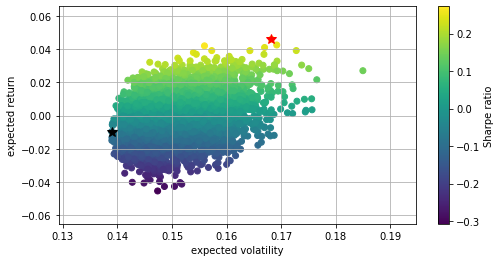

In [34]:
prets = []
pvols = []
weights_group = []
for p in range(5000):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    weights_group.append(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))

prets = np.array(prets)
pvols = np.array(pvols)

# 波动率最小的点
idxmin = np.argmin(pvols)
min_vol = pvols[idxmin]
min_vol_ret = prets[idxmin]
print(min_vol, min_vol_ret)
print(weights_group[idxmin])

# 夏普率最高的点
idxmax = np.argmax(prets/pvols)
max_sharpe_vol = pvols[idxmax]
max_sharpe_ret = prets[idxmax]
print(max_sharpe_vol, max_sharpe_ret)
print(weights_group[idxmax])

plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.plot(min_vol, min_vol_ret,'k*',markersize=10.0)
plt.plot(max_sharpe_vol, max_sharpe_ret,'r*',markersize=10.0)

plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
